In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from ud_parser.ud_parser import UDScores
from language_utils.utils import *

%matplotlib notebook
plt.ion()

In [2]:
parser = UDScores(metric='las')
data = parser.get_data()
data = [datum for datum in data if datum.system != 'SParse (İstanbul)']

systems = set(datum.system for datum in data)
languages = set(datum.language for datum in data).difference({None})
treebanks = set(datum.tb_code for datum in data if datum.language)


def filter_data(mean=False, **kwargs):
    def filter_function(datum):
        return all(getattr(datum, key) == value for key, value in kwargs.items())
    filtered = filter(filter_function, data)
    if mean:
        return np.mean([datum.perf for datum in filtered])
    else:
        return filtered

I remove the `'SParse (İstanbul)'` submission since it seems to be completely broken (average LAS=1%)

# Comparing treebank size and performance

Germanic-Romance(Italic)-Slavic (GRS) languages are red, while all the other languages are blue. We can see the expected relation between treebank size and performance, although it is not very strong. There is a clear disparity between GRS and non-GRS languages as far as performance goes. We can also see that there are several left-behind blue languages. These have extremely small amounts of data and there is no treebank in the same language or in the very similar language to help them out. These are the languages we might want to focus on later. The worst results are for Thai.

In [3]:
fig = plt.figure()
for tb_code in treebanks:
    perf = filter_data(mean=True, tb_code=tb_code)
    c = {
        True: 'r',
        False: 'b'
    }[tb_code_belongs_to(tb_code, fam.grs)]
    plt.scatter(tb_sizes[tb_code], perf, c=c, s=3)
#     plt.annotate(tb_code,
#                  xy=(tb_sizes[tb_code], perf),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom',
#                  fontsize='xx-small')
    plt.xlabel('Treebank size')
    plt.ylabel('Average performance')
fig.canvas.draw_idle()

<IPython.core.display.Javascript object>

AttributeError: 'Node' object has no attribute 'belongs_to'

<IPython.core.display.Javascript object>


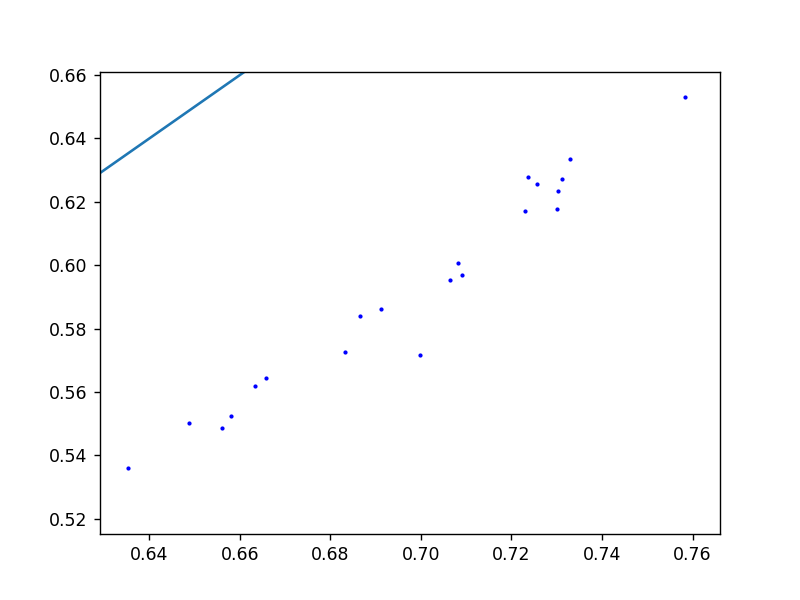

In [4]:
fig = plt.figure()
for system in systems:
    mean = filter_data(mean=True, system=system, aggregate=False) / 100
    system_data = list(filter_data(system=system, aggregate=False))
    high_mean = np.mean([
        datum.perf
        for datum
        in system_data
        if datum.language.belongs_to(fam.grs)
    ]) / 100
    low_mean = np.mean([
        datum.perf
        for datum
        in system_data
        if not datum.language.belongs_to(fam.grs)
    ]) / 100
    plt.scatter(mean, low_mean, c='b', s=2)

plt.plot([0.4, 0.8], [0.4, 0.8])
fig.canvas.draw_idle()


In [66]:
import lang2vec.lang2vec as l2v
import umap
import umap.plot
import numpy as np
import matplotlib.pyplot as plt

from language_utils.utils import fam
from languages import Node, Language

languages = list(l2v.available_uriel_languages())
families = l2v.get_features('en', 'fam', header=True)['CODE']
isos = dict(
    line.strip().split(' ', maxsplit=1)
    for line
    in open('iso.txt', encoding='utf-8')
)

In [67]:
lang_fams = {l: set() for l in languages}
data = l2v.get_features(languages, 'fam')
for lang, vec in data.items():
    for val, fam in zip(vec, families):
        if val:
            lang_fams[lang].add(fam)


In [58]:
coi = {
    'F_Atlantic-Congo',
    'F_Austronesian',
    'F_Indo-European',
    'F_Afro-Asiatic',
    'F_Sino-Tibetan',
    'F_Nuclear_Trans_New_Guinea',
    'F_Pama-Nyungan',
    'F_Otomanguean',
    'F_Austroasiatic',
}

In [59]:
dd = {
    f: sum(
        f in lang_fams[l]
        for l
        in languages
        if not lang_fams[l].intersection(coi)
    )
    for f
    in families
}

for k in sorted(dd, key=lambda x: -dd[x]):
    print(k, dd[k])


F_Tupian 56
F_Sign_Language 55
F_Arawakan 49
F_Sign_Languages 49
F_Uto-Aztecan 42
F_Mande 41
F_Tupi-Guarani 39
F_Dravidian 38
F_Algic 36
F_Turkic 35
F_Common_Turkic 34
F_Algonquian 34
F_Athapaskan-Eyak-Tlingit 32
F_Athapaskan-Eyak 31
F_Athapaskan 30
F_Central_Sudanic 30
F_Nilotic 30
F_Nakh-Daghestanian 29
F_Southern_Uto-Aztecan 29
F_Western_Mande 29
F_South_Dravidian 27
F_Tai-Kadai 27
F_Cariban 26
F_Daghestanian 26
F_Uralic 25
F_Oghuz-Kipchak-Uyghur 24
F_Mayan 24
F_Nuclear_Torricelli 24
F_Quechuan 23
F_Core_Mayan 22
F_Kam-Tai 22
F_Nuclear-Macro-Je 21
F_Southern_Maipuran 21
F_Salishan 21
F_Panoan 20
F_Oghuz 20
F_Northern_Maipuran 20
F_Manding-Kpelle 20
F_Tucanoan 19
F_Northern_Athapaskan 19
F_South_Dravidian_I 19
F_Sepik 19
F_Western_Nilotic 18
F_Chibchan 18
F_Lower_Sepik-Ramu 18
F_Mainline_Pano 17
F_Corachol-Aztecan 17
F_Sara-Bongo-Bagirmi 17
F_Core_Chibchan 17
F_Tamil-Kannada 16
F_Quechua_II 16
F_Pano_Nawa 15
F_Je 14
F_Eastern_Tucanoan 14
F_Siouan 14
F_Be-Tai 14
F_Daic 14
F_Central_Ma

F_Kuikuroan 1
F_Nuclear_Kuikuro 1
F_Unclassified_Barbacoan 1
F_Kalapuyan 1
F_Lachic 1
F_Paha-Laha 1
F_Limilngan 1
F_Maxakali 1
F_Western_Maxakali 1
F_Eastern_Arhuacic 1
F_Maquiritari-Wayumara 1
F_Lowland-Midland_Mixe 1
F_Lowland_Mixe 1
F_Nuclear_Maba 1
F_Dizoid 1
F_Marithielic 1
F_Bantu-Cushitic_(Mixed_Language) 1
F_Manambu-Yalaku 1
F_Manchu-Xibe 1
F_Western_West-Central_Heiban 1
F_Matis_subgroup 1
F_Somahai 1
F_Mombum 1
F_Mikarewan 1
F_Nor 1
F_Monumbo 1
F_Maninka-Mori 1
F_Southern_Wakashan 1
F_Naro-Ana 1
F_Hua_(Tuu) 1
F_Taa 1
F_Nanticoke-Conoy 1
F_Norwegian_Sign 1
F_Debao-Jingxi-Nung 1
F_Mehek-Pahi 1
F_Nyulnyulic 1
F_Insular_Chonan 1
F_Olo-Elkei 1
F_Opata-Eudeve 1
F_Western_Eleman 1
F_Osage-Kansa 1
F_Central_West-Central_Heiban 1
F_Ebang-Logol 1
F_Kao_River 1
F_Paguic 1
F_Maco-Piaroa 1
F_Northern_Kalenjin 1
F_Eastern_Maipuran 1
F_Pocom 1
F_Gulf_Zoque 1
F_Ayacuchan_Quechua 1
F_Cuscan_Quechua 1
F_Yaru_Quechua 1
F_Rashad 1
F_Votic_Chibchan 1
F_Rotokas-Askopan 1
F_Runga-Kibet 1
F_Russian_

F_Ngada-Lio-Paluqe 0
F_Vehicular_Malay 0
F_Eastern_Indonesia_Trade_Malay 0
F_Pontic-Cappadocian_Greek 0
F_Lechitic 0
F_Bali-Sasak-Sumbawa 0
F_Sasak-Sumbawa 0
F_Surinamese_Creole_English 0
F_East_Scandinavian 0
F_Macro-Swedish 0
F_Aramaic 0
F_Eastern_Aramaic 0
F_Central_Eastern_Aramaic 0
F_North-Eastern_Neo-Aramaic 0
F_Trans-Zab 0
F_South-Eastern_Trans-Zab 0
F_Pacific_Creole_English 0
F_Early_Melanesian_Pidgin 0
F_Trique 0
F_Admiralty_Islands 0
F_Eastern_Admiralty_Islands 0
F_Manus 0
F_East_Manus 0
F_Tokharian 0
F_Ukrainian-Rusyn 0
F_Gallo-Italian 0
F_Ngumpin-Yapa 0
F_Ngarga 0
F_Harari-East_Gurage 0
F_Silte-Wolane 0
F_Nuclear_Kongo-Yaka-Suku-Hungan 0
F_Yaka-Suku 0
F_Edekiri 0
F_Ede 0
F_Eastern_Ede 0
F_Southeastern_Ede 0
F_Nuclear_Yoruba 0
F_Lucumi-Yoruba 0
F_Zapotecan 0
F_Zapotec 0
F_Core_Zapotec 0
F_Central_Core_Zapotec 0
F_Agneby 0
F_Ka-Togo 0
F_Kposo-Ahlo-Bowili 0
F_Sudanese-Chadian_Arabic 0
F_South_Ring 0
F_Babungoic 0
F_Southern_Central_Gur 0
F_Bia 0
F_Northern_Bia 0
F_Oti-Volta_Or

F_Pomoikan 0
F_Nabi-Irarutu 0
F_Southwestern_Edoid 0
F_Batanic 0
F_Ngarna 0
F_Jarawan 0
F_Nigerian_Jarawan 0
F_Jarawaic 0
F_Jukunoid 0
F_Central_Jukunoid 0
F_Jukun-Mbembe-Wurbo 0
F_Jukun 0
F_Aslian 0
F_Central-Northern_Aslian 0
F_North_Aslian 0
F_Maniq-Menraq-Batek 0
F_Menraq-Batek 0
F_Jino 0
F_Yamdena-Onin 0
F_Kinnauric 0
F_Thebor 0
F_Kabyle-Atlas_Berber 0
F_Jingpho-Luish 0
F_Jingpho 0
F_Eastern_Central_Kenya_Bantu 0
F_Kamano-Yagaria 0
F_Benue-Congo_Central_Plateau 0
F_South-Central_Benue-Congo_Plateau 0
F_Katabic 0
F_Shona_(S.10) 0
F_Kalanga-Nambya 0
F_Ruvu 0
F_East_Ruvu 0
F_Central_East_Ruvu 0
F_Ruund-Salampasu 0
F_Lunda-Ruund-Kete 0
F_Ruund-Kete 0
F_Pintupic 0
F_Nuclear_Pintupic 0
F_Wangkatja-Tjarra 0
F_Tjarra 0
F_Ruvuma 0
F_Western_Benue-Congo_Plateau 0
F_Northwestern_Benue-Congo_Plateau 0
F_Gyong-Kamantan 0
F_East_Chadic_A_A.3 0
F_Lampung 0
F_Kham 0
F_Gumbaynggiric 0
F_South-Western_Tibetic 0
F_Kyirong-Kagate 0
F_Gyalsumdo-Nubri-Kyirong 0
F_Becking-Dawi 0
F_Kham-Hor 0
F_Chitral 0

F_Setic 0
F_Chamealic 0
F_Bhadrawahi-Bhalesi-Curahi 0
F_Western_Rajasthani 0
F_Inland_Bikol 0
F_Bohtan 0
F_Buwal-Gavar 0
F_Kumilan 0
F_Kwanka-Sur 0
F_Numan 0
F_West_Manus 0
F_Outer_Enga 0
F_Unclassified_Ngiri 0
F_Budja_(C.36) 0
F_Northwestern_Jewish_Neo-Aramaic 0
F_Bola-Bulu 0
F_Shabak-Bajalani 0
F_East_Borneo_Malay 0
F_Mid-Southern 0
F_Bakwe-Wane 0
F_Kalinga-Itneg 0
F_Kalinga 0
F_Baruga-Doghoro 0
F_Bikwin-Jen 0
F_Bikwin 0
F_Bambuka-Gomu-Leelau 0
F_Gbanzili 0
F_Baki-Bierebo 0
F_Bukitanic-Busangic 0
F_Bukat-Ukit-Beketan-Lugat-Lisum 0
F_Masbate-Sorsogon 0
F_Buhid-Taubuid 0
F_Bekwilic 0
F_Eastern_Bungku-Tolaki 0
F_East_Coast 0
F_Bulangic 0
F_Southern_Tomini 0
F_Northern_Njila 0
F_Mbundu_(H.20) 0
F_Mag-Ayta 0
F_Bullom 0
F_Northern_Bullom 0
F_Bom-Kim 0
F_Bamweic 0
F_Northern_Malagasic 0
F_Tsimihety-Betsimisaraka 0
F_Bwamu 0
F_Banda-Geser 0
F_East_Rivers_Seram 0
F_Batangan 0
F_Beezen-Baazem 0
F_Karre-Boni 0
F_Boma-Tiene 0
F_Kewieng-Bonkiman-Nokopo 0
F_Nuclear_Bwamu 0
F_Ngbele-Ngenda 0
F_Ngen

In [69]:
data = np.vstack([
    vec
    for vec
    in l2v.get_features(
        languages=languages,
        feature_set_inp='syntax_knn+phonology_knn+inventory_knn',
    ).values()
])


<IPython.core.display.Javascript object>


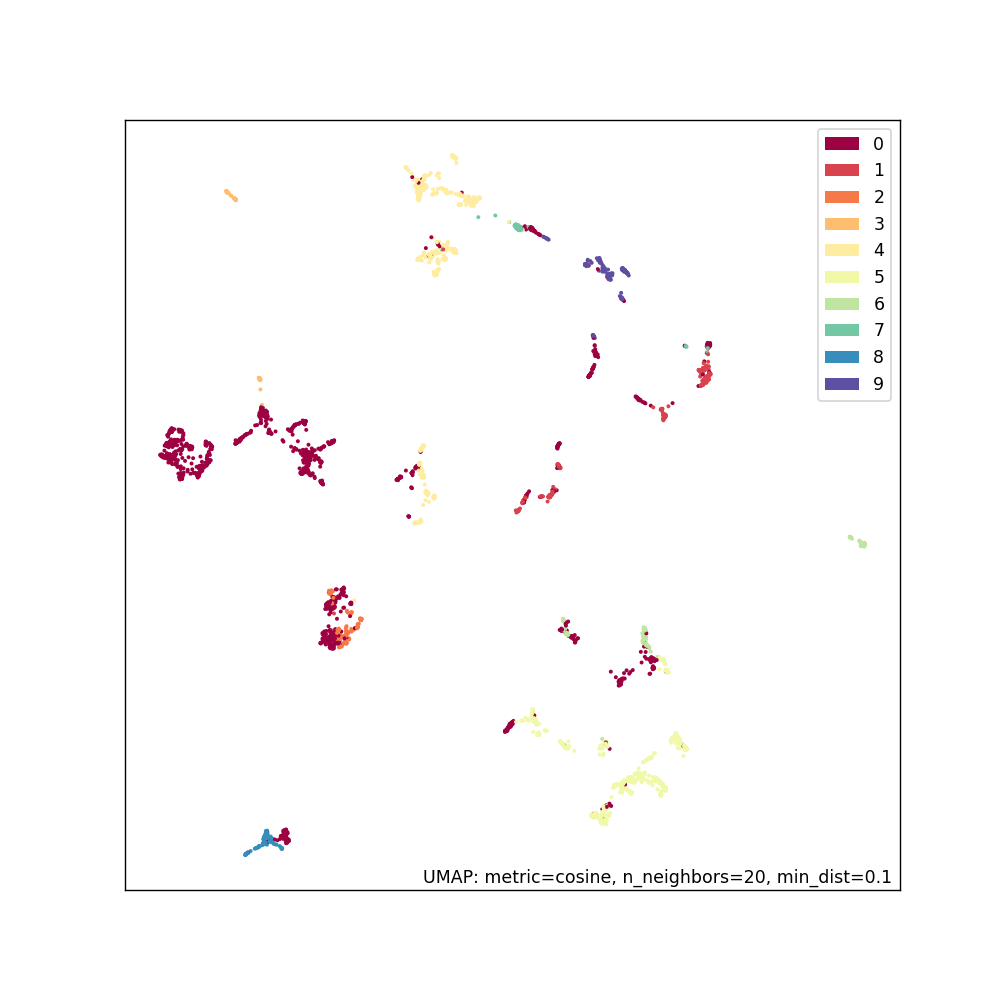

In [70]:
coi_l = {l: i+1 for i, l in enumerate(coi)}

labels = [
    max(
        [coi_l.get(c, 0)
        for c
        in lang_fams[l]] + [0]
    )
    for l
    in languages
]

reducer = umap.UMAP(n_neighbors=20, metric='cosine')
trans = reducer.fit(data)
umap.plot.points(
    trans,
    labels=np.array(labels)
)

In [71]:
print(coi_l)

{'F_Indo-European': 1, 'F_Nuclear_Trans_New_Guinea': 2, 'F_Otomanguean': 3, 'F_Austronesian': 4, 'F_Atlantic-Congo': 5, 'F_Afro-Asiatic': 6, 'F_Austroasiatic': 7, 'F_Pama-Nyungan': 8, 'F_Sino-Tibetan': 9}


In [ ]:
umap.plot.connectivity(trans, show_points=True, edge_bundling='hammer')

C:\Users\matus\AppData\Roaming\Python\Python38\site-packages\umap\plot.py:849: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


In [22]:
from bokeh.plotting import show, save, output_notebook, output_file


p = umap.plot.interactive(
    trans,
    labels=[0 for _ in range(data.shape[0])],
    hover_data={'a': ['b' for _ in range(data.shape[0])]},
    width=500,
    height=500,
)
output_notebook()
show(p)

Loading BokehJS ...

{'CODE': ['F_Austronesian',
  'F_Nuclear_Austronesian',
  'F_Malayo-Polynesian',
  'F_Central-Eastern_Malayo-Polynesian',
  'F_Eastern_Malayo-Polynesian',
  'F_Oceanic',
  'F_Western_Oceanic_linkage',
  'F_North_New_Guinea_linkage',
  'F_Huon_Gulf',
  'F_Markham',
  'F_Ainu',
  'F_Atlantic-Congo',
  'F_Volta-Congo',
  'F_Kwa_Volta-Congo',
  'F_Nyo',
  'F_Potou-Tano',
  'F_Tano',
  'F_Central_Tano',
  'F_Akanic',
  'F_Muskogean',
  'F_Alabaman-Koasati',
  'F_Eskimo-Aleut',
  'F_Mangarrayi-Maran',
  'F_Maran',
  'F_Indo-European',
  'F_Albanian',
  'F_Albanian-Tosk',
  'F_Panoan',
  'F_Mainline_Pano',
  'F_Pano_Nawa',
  'F_Headwaters',
  'F_Arawakan',
  'F_Western_Maipuran',
  'F_Afro-Asiatic',
  'F_Semitic',
  'F_West_Semitic',
  'F_Ethiosemitic',
  'F_South_Ethiopic',
  'F_Transversal_South_Ethiopic',
  'F_Amharic-Argobba',
  'F_Chadic',
  'F_West_Chadic',
  'F_West_Chadic_A',
  'F_West_Chadic_A.2-3',
  'F_West_Chadic_A_A.3',
  'F_Pama-Nyungan',
  'F_Desert_Nyungic',
  'F_Wati',
  'F_U